In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.linalg import eig
# from numpy.linalg import eig

In [2]:
# two dimension data
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [4]:
#create dataframe 
df = pd.DataFrame(data, columns=["ML","DL"])

In [5]:
df

,ML,DL
0,3,4
1,2,8
2,6,9
3,10,12


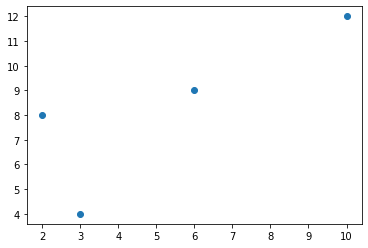

In [6]:
plt.scatter(df["ML"], df["DL"])

In [7]:
#PCA steps 
"""1. Standarization of the data (Zero centric means NSD {mean is 0 and the standard deviation is 1})
 2. Covariance matrix
 3. Eigen value and eigen vector
 4. Find the princple component"""

'1. Standarization of the data (Zero centric means NSD {mean is 0 and the standard deviation is 1})\n 2. Covariance matrix\n 3. Eigen value and eigen vector\n 4. Find the princple component'

In [8]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [9]:
data.T

array([[ 3,  2,  6, 10],
       [ 4,  8,  9, 12]])

In [10]:
np.mean(data, axis=1)

array([ 3.5,  5. ,  7.5, 11. ])

In [11]:
np.mean(data.T, axis=1)

array([5.25, 8.25])

In [12]:
mean_by_col = np.mean(data, axis=0)

In [13]:
scaled_data = data - mean_by_col

In [14]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [15]:
# step-2 covariance matrix: because we want relation between variable 

In [16]:
cov_mat = np.cov(scaled_data.T)

In [17]:
cov_mat

array([[12.91666667,  9.58333333],
       [ 9.58333333, 10.91666667]])

In [18]:
#step -3: eigen value and eigen vector 
eig_value, eig_vector = np.linalg.eig(cov_mat)

In [19]:
eig_value

array([21.55203266,  2.28130068])

In [20]:
eig_vector

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [21]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [22]:
# PC = eign vectr * data

In [26]:
eig_vector.T.dot(scaled_data.T).T

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [28]:
from sklearn.decomposition import PCA
pca = PCA()

In [29]:
pca.fit_transform(scaled_data)

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [30]:
pd.DataFrame(data=pca.fit_transform(scaled_data), columns=["PC1","PC2"])

,PC1,PC2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [33]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [34]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [35]:
pca.explained_variance_ratio_

array([0.90428109, 0.09571891])

In [53]:
data_url = "https://github.com/FazlullahBokhari/Datasets/blob/main/glass.data?raw=true"
col_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']

In [54]:
new_data = pd.read_csv(url, index_col=0, names=col_names)

In [55]:
new_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [61]:
new_df = new_data.drop(labels=['Class'], axis=1)

In [62]:
new_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [63]:
new_df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [65]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [66]:
#step - 1: standarization of the data
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [67]:
scaled_data = scaled.fit_transform(new_df)

In [68]:
scaled_data

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [70]:
scaled_df = pd.DataFrame(scaled_data, columns=new_df.columns)

In [71]:
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [72]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,-2.877449e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.179980e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-2.801497e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-3.434428e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.966067e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,7.470660e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.137418e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-1.763906e-16,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-6.121791e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


In [73]:
from sklearn.decomposition import PCA
pca = PCA()

In [75]:
pcs = pca.fit_transform(scaled_df)

In [76]:
pcs

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [78]:
pcs_df = pd.DataFrame(data=pcs)

In [79]:
pcs_df

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [80]:
pcs_df.shape

(214, 9)

In [86]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [87]:
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [88]:
type(var)

numpy.ndarray

In [90]:
max(var)*100

27.901819179456428

In [91]:
min(var)*100

0.017875753590172464

In [92]:
sum(var)

0.9999999999999998

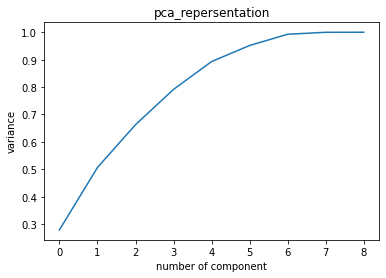

In [93]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel("number of component")
plt.ylabel("variance")
plt.title("pca_repersentation")
plt.show()

In [94]:
new_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [95]:
pcs_df.head()

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315


In [96]:
np.sort(var)

array([1.78757536e-04, 7.09477197e-03, 4.09953826e-02, 5.86261325e-02,
       1.01555805e-01, 1.28651383e-01, 1.56093777e-01, 2.27785798e-01,
       2.79018192e-01])

In [97]:
sorted(var, reverse=True)

[0.2790181917945643,
 0.22778579831670412,
 0.15609377710940472,
 0.12865138291980255,
 0.10155580523615625,
 0.05862613252208679,
 0.040995382590555844,
 0.007094771974823571,
 0.00017875753590172464]

In [99]:
sum(sorted(var, reverse=True)[:6])*100

95.17310878987188